In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


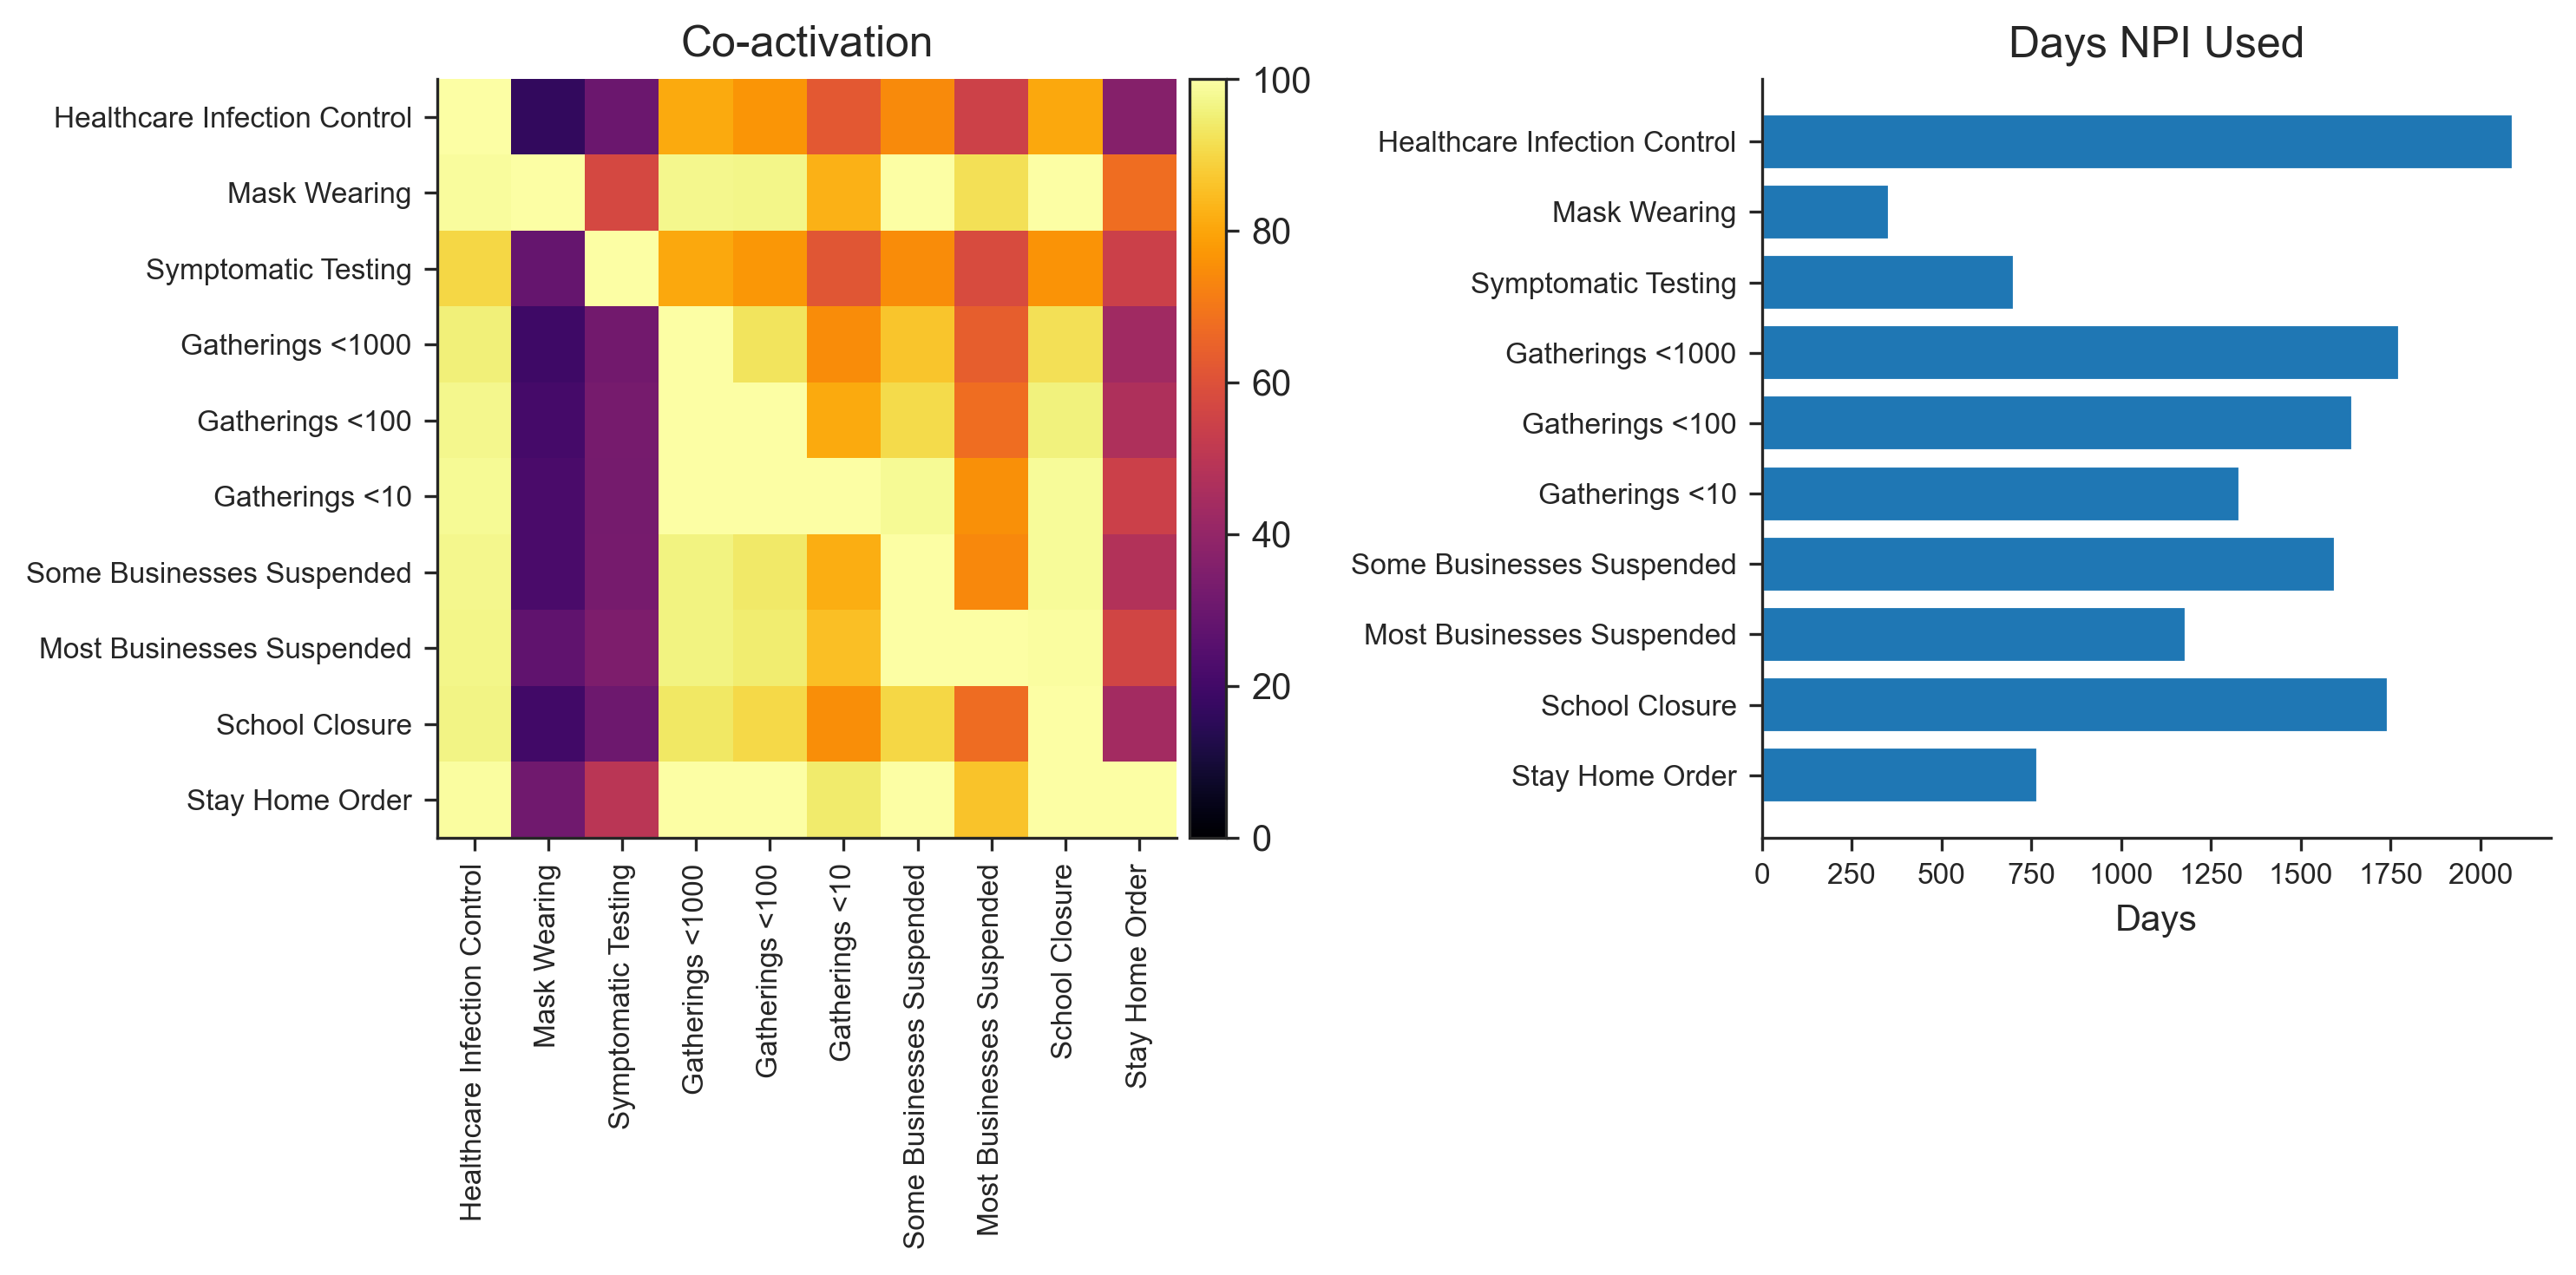

In [12]:
dp = DataPreprocessor()
data = dp.preprocess_data("data_final.csv")

In [13]:
# def mask_region_ends(d, region, ndays=10):
#     i = d.Rs.index(region)
#     d.Active.mask[i,-ndays:] = True
#     d.Confirmed.mask[i,-ndays:] = True
#     d.Deaths.mask[i,-ndays:] = True
#     d.NewDeaths.mask[i,-ndays:] = True
#     d.NewCases.mask[i,-ndays:] = True

# for region in data.Rs:
#     mask_region_ends(data, region, 7)

In [14]:
for r_i, region in enumerate(data.Rs):
    if data.ActiveCMs[r_i, 1, -1] == 1:
        print(f"region {region} has {data.Deaths[r_i, -1]} deaths at the end and masks on at the end with {np.sum(data.ActiveCMs[r_i, 1, :])} days of masks")

region AD has 40.0 deaths at the end and masks on at the end with 9.0 days of masks
region AT has 536.0 deaths at the end and masks on at the end with 25.0 days of masks
region BA has 57.0 deaths at the end and masks on at the end with 28.0 days of masks
region BG has 55.0 deaths at the end and masks on at the end with 27.0 days of masks
region CZ has 218.0 deaths at the end and masks on at the end with 38.0 days of masks
region IL has 199.0 deaths at the end and masks on at the end with 14.0 days of masks
region LT has 41.0 deaths at the end and masks on at the end with 16.0 days of masks
region MY has 98.0 deaths at the end and masks on at the end with 40.0 days of masks
region MX has 1305.0 deaths at the end and masks on at the end with 5.0 days of masks
region MA has 159.0 deaths at the end and masks on at the end with 19.0 days of masks
region PL has 524.0 deaths at the end and masks on at the end with 10.0 days of masks
region RO has 601.0 deaths at the end and masks on at the en

In [15]:
# data.filter_regions(["ES", "IT"])

In [16]:
for r_i, region in enumerate(data.Rs):
    if data.ActiveCMs[r_i, 1, -1] == 1:
        print(f"region {region} has {data.Deaths[r_i, -1]} deaths at the end and masks on at the end with {np.sum(data.ActiveCMs[r_i, 1, :])} days of masks")

region AD has 40.0 deaths at the end and masks on at the end with 9.0 days of masks
region AT has 536.0 deaths at the end and masks on at the end with 25.0 days of masks
region BA has 57.0 deaths at the end and masks on at the end with 28.0 days of masks
region BG has 55.0 deaths at the end and masks on at the end with 27.0 days of masks
region CZ has 218.0 deaths at the end and masks on at the end with 38.0 days of masks
region IL has 199.0 deaths at the end and masks on at the end with 14.0 days of masks
region LT has 41.0 deaths at the end and masks on at the end with 16.0 days of masks
region MY has 98.0 deaths at the end and masks on at the end with 40.0 days of masks
region MX has 1305.0 deaths at the end and masks on at the end with 5.0 days of masks
region MA has 159.0 deaths at the end and masks on at the end with 19.0 days of masks
region PL has 524.0 deaths at the end and masks on at the end with 10.0 days of masks
region RO has 601.0 deaths at the end and masks on at the en

In [17]:
data.filter_region_min_deaths(500)

Region AL removed since it has 27.0 deaths on the last day
Region AD removed since it has 40.0 deaths on the last day
Region BA removed since it has 57.0 deaths on the last day
Region BG removed since it has 55.0 deaths on the last day
Region HR removed since it has 54.0 deaths on the last day
Region CZ removed since it has 218.0 deaths on the last day
Region DK removed since it has 418.0 deaths on the last day
Region EE removed since it has 46.0 deaths on the last day
Region FI removed since it has 186.0 deaths on the last day
Region GE removed since it has 0.0 deaths on the last day
Region GR removed since it has 130.0 deaths on the last day
Region HU removed since it has 262.0 deaths on the last day
Region IS removed since it has 10.0 deaths on the last day
Region IL removed since it has 199.0 deaths on the last day
Region LV removed since it has 12.0 deaths on the last day
Region LT removed since it has 41.0 deaths on the last day
Region MY removed since it has 98.0 deaths on the l

In [18]:
with cm_effect.models.CMDeath_Final(data) as model:
    model.build_model()

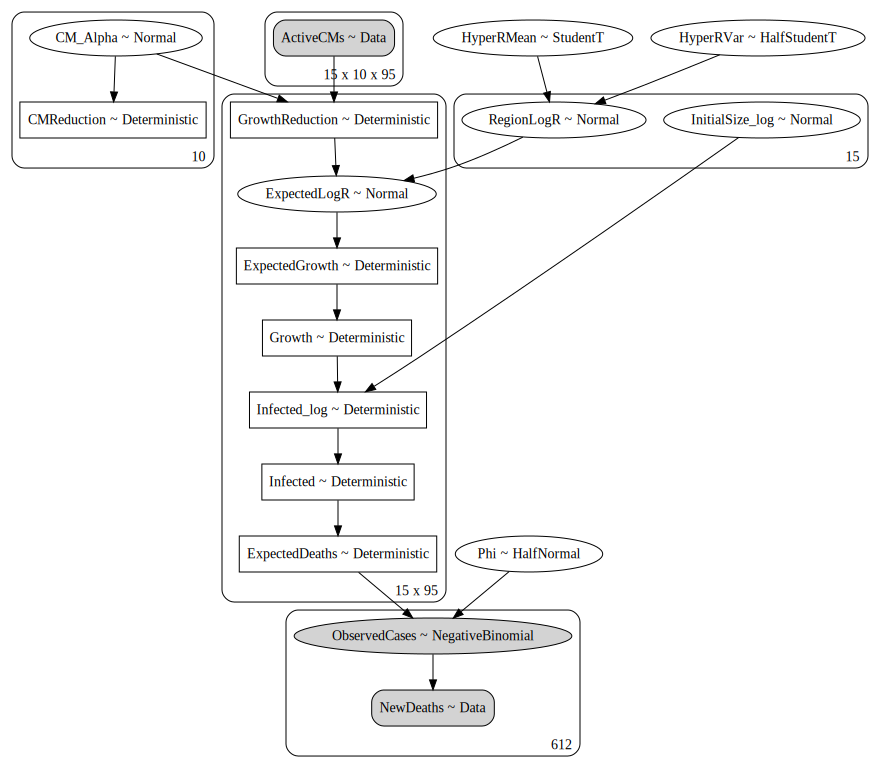

In [19]:
pm.model_to_graphviz(model).render("model-death-final")
pm.model_to_graphviz(model)

In [20]:
with model.model:
    model.trace = pm.sample(2000, chains=2, target_accept=0.95)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Phi, InitialSize_log, ExpectedLogR, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, ExpectedLogR, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [20:05<00:00,  4.15draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [9]:
np.savetxt("death1305.txt", model.trace["CMReduction"])

In [22]:
np.mean(model.trace.Phi)

38.940087044971285

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 18-05;15-45
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 18-05;15-45


<Figure size 2100x900 with 0 Axes>

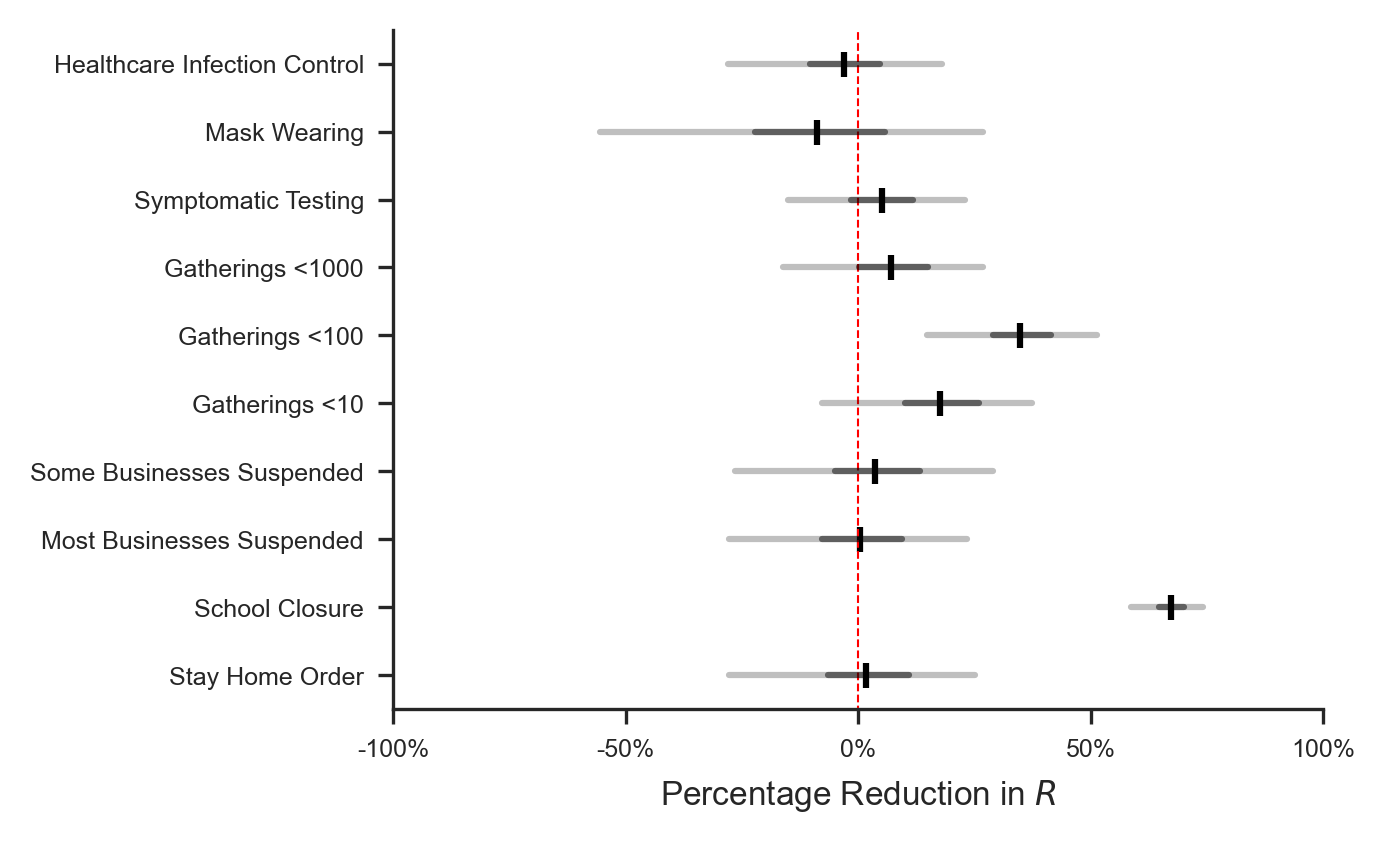

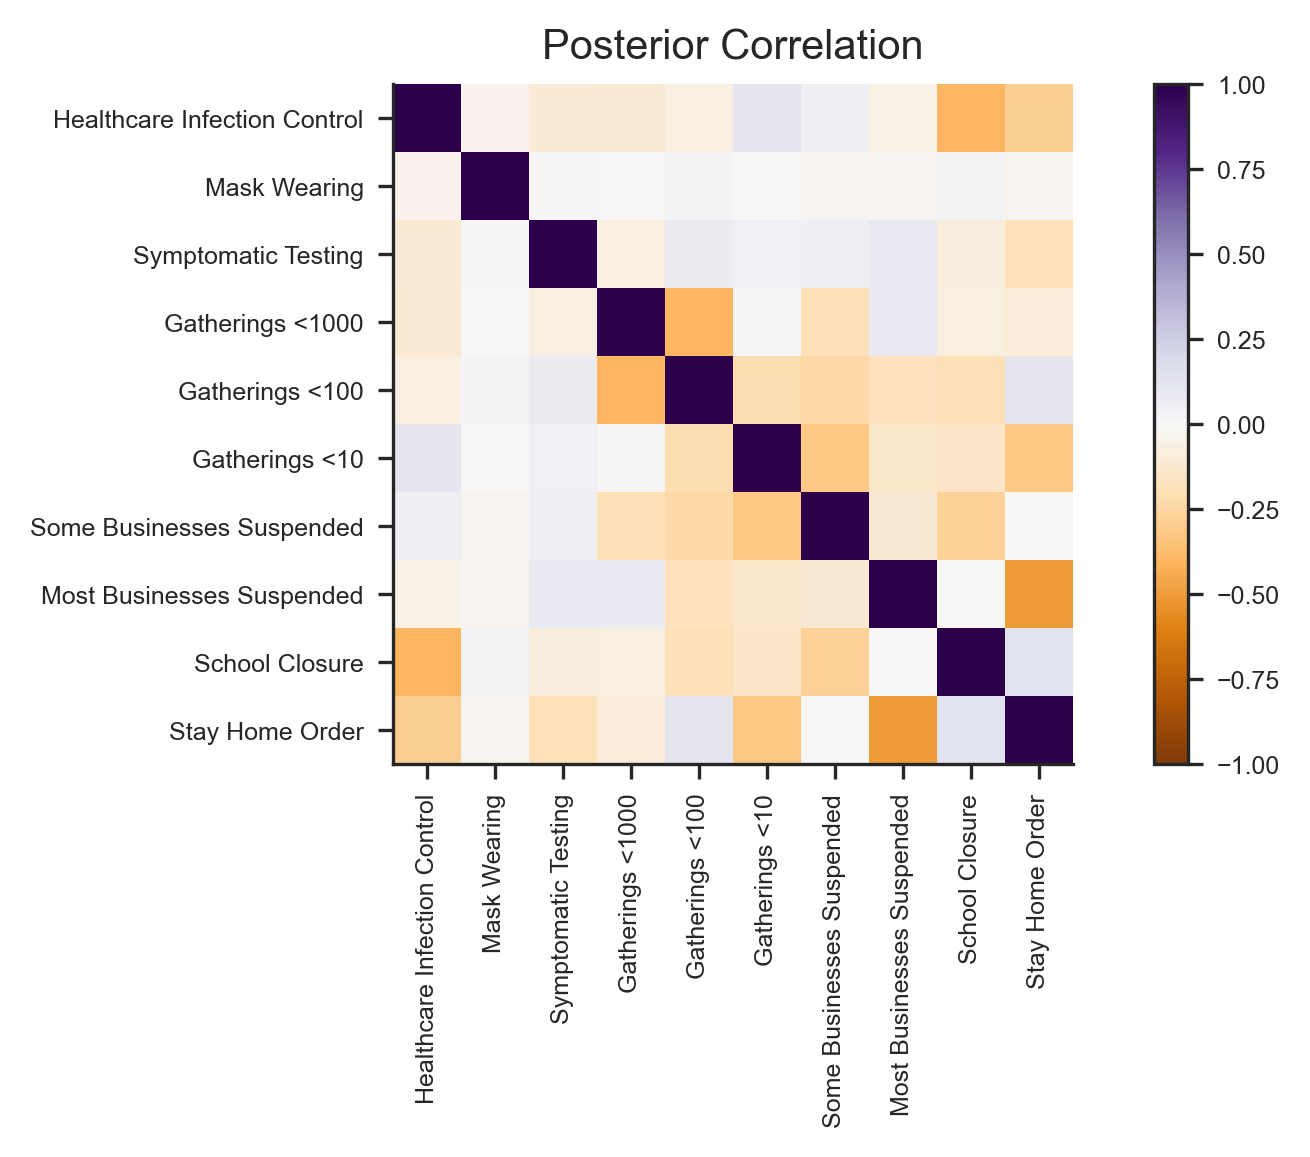

In [21]:
model.plot_effect()

In [24]:
for r_i, region in enumerate(data.Rs):
    if data.ActiveCMs[r_i, 1, -1] == 1:
        print(f"region {region} has {data.Deaths[r_i, -1]} deaths at theend and masks on at the end with {np.sum(data.ActiveCMs[r_i, 1, :])} days of masks")

region AD has 40.0 deaths at the end and masks on at the end with 12.0 days of masks
region AT has 536.0 deaths at the end and masks on at the end with 25.0 days of masks
region BA has 57.0 deaths at the end and masks on at the end with 28.0 days of masks
region BG has 55.0 deaths at the end and masks on at the end with 27.0 days of masks
region CZ has 218.0 deaths at the end and masks on at the end with 40.0 days of masks
region IL has 199.0 deaths at the end and masks on at the end with 14.0 days of masks
region LT has 41.0 deaths at the end and masks on at the end with 16.0 days of masks
region MY has 98.0 deaths at the end and masks on at the end with 40.0 days of masks
region MX has 1305.0 deaths at the end and masks on at the end with 5.0 days of masks
region MA has 159.0 deaths at the end and masks on at the end with 19.0 days of masks
region PL has 524.0 deaths at the end and masks on at the end with 12.0 days of masks
region RO has 601.0 deaths at the end and masks on at the e

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 18-05;17-30
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 18-05;17-30
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 18-05;17-31


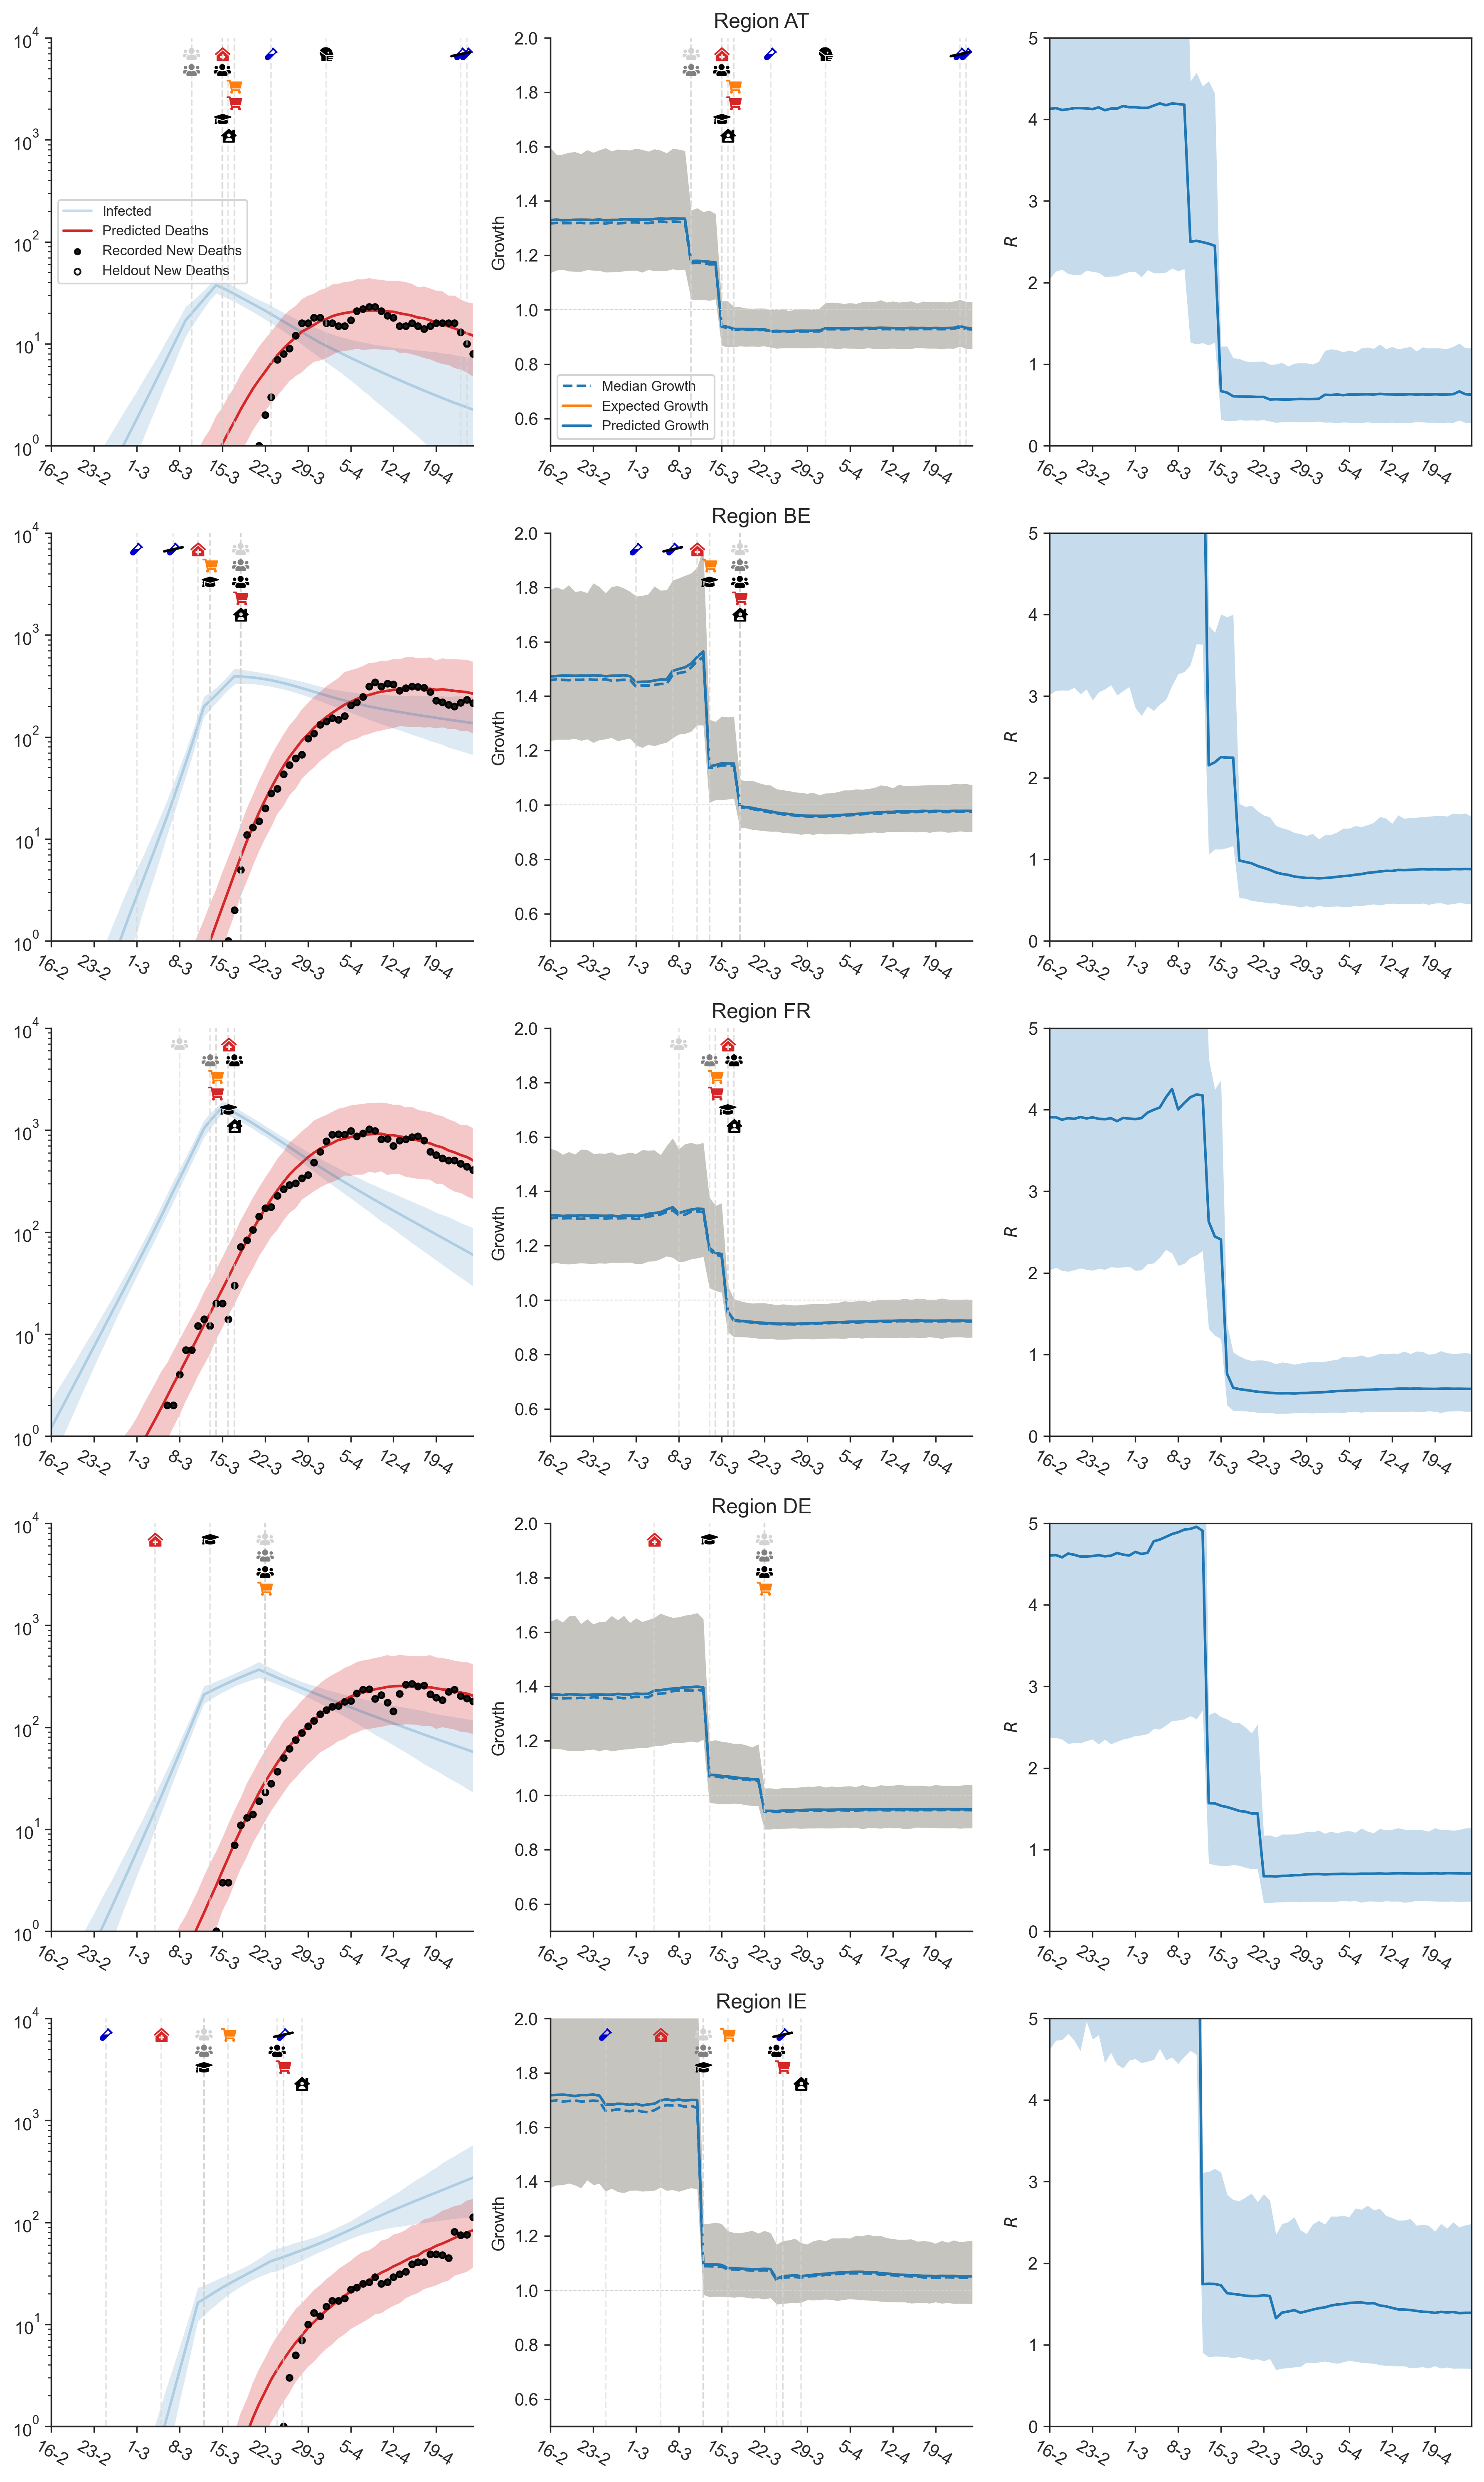

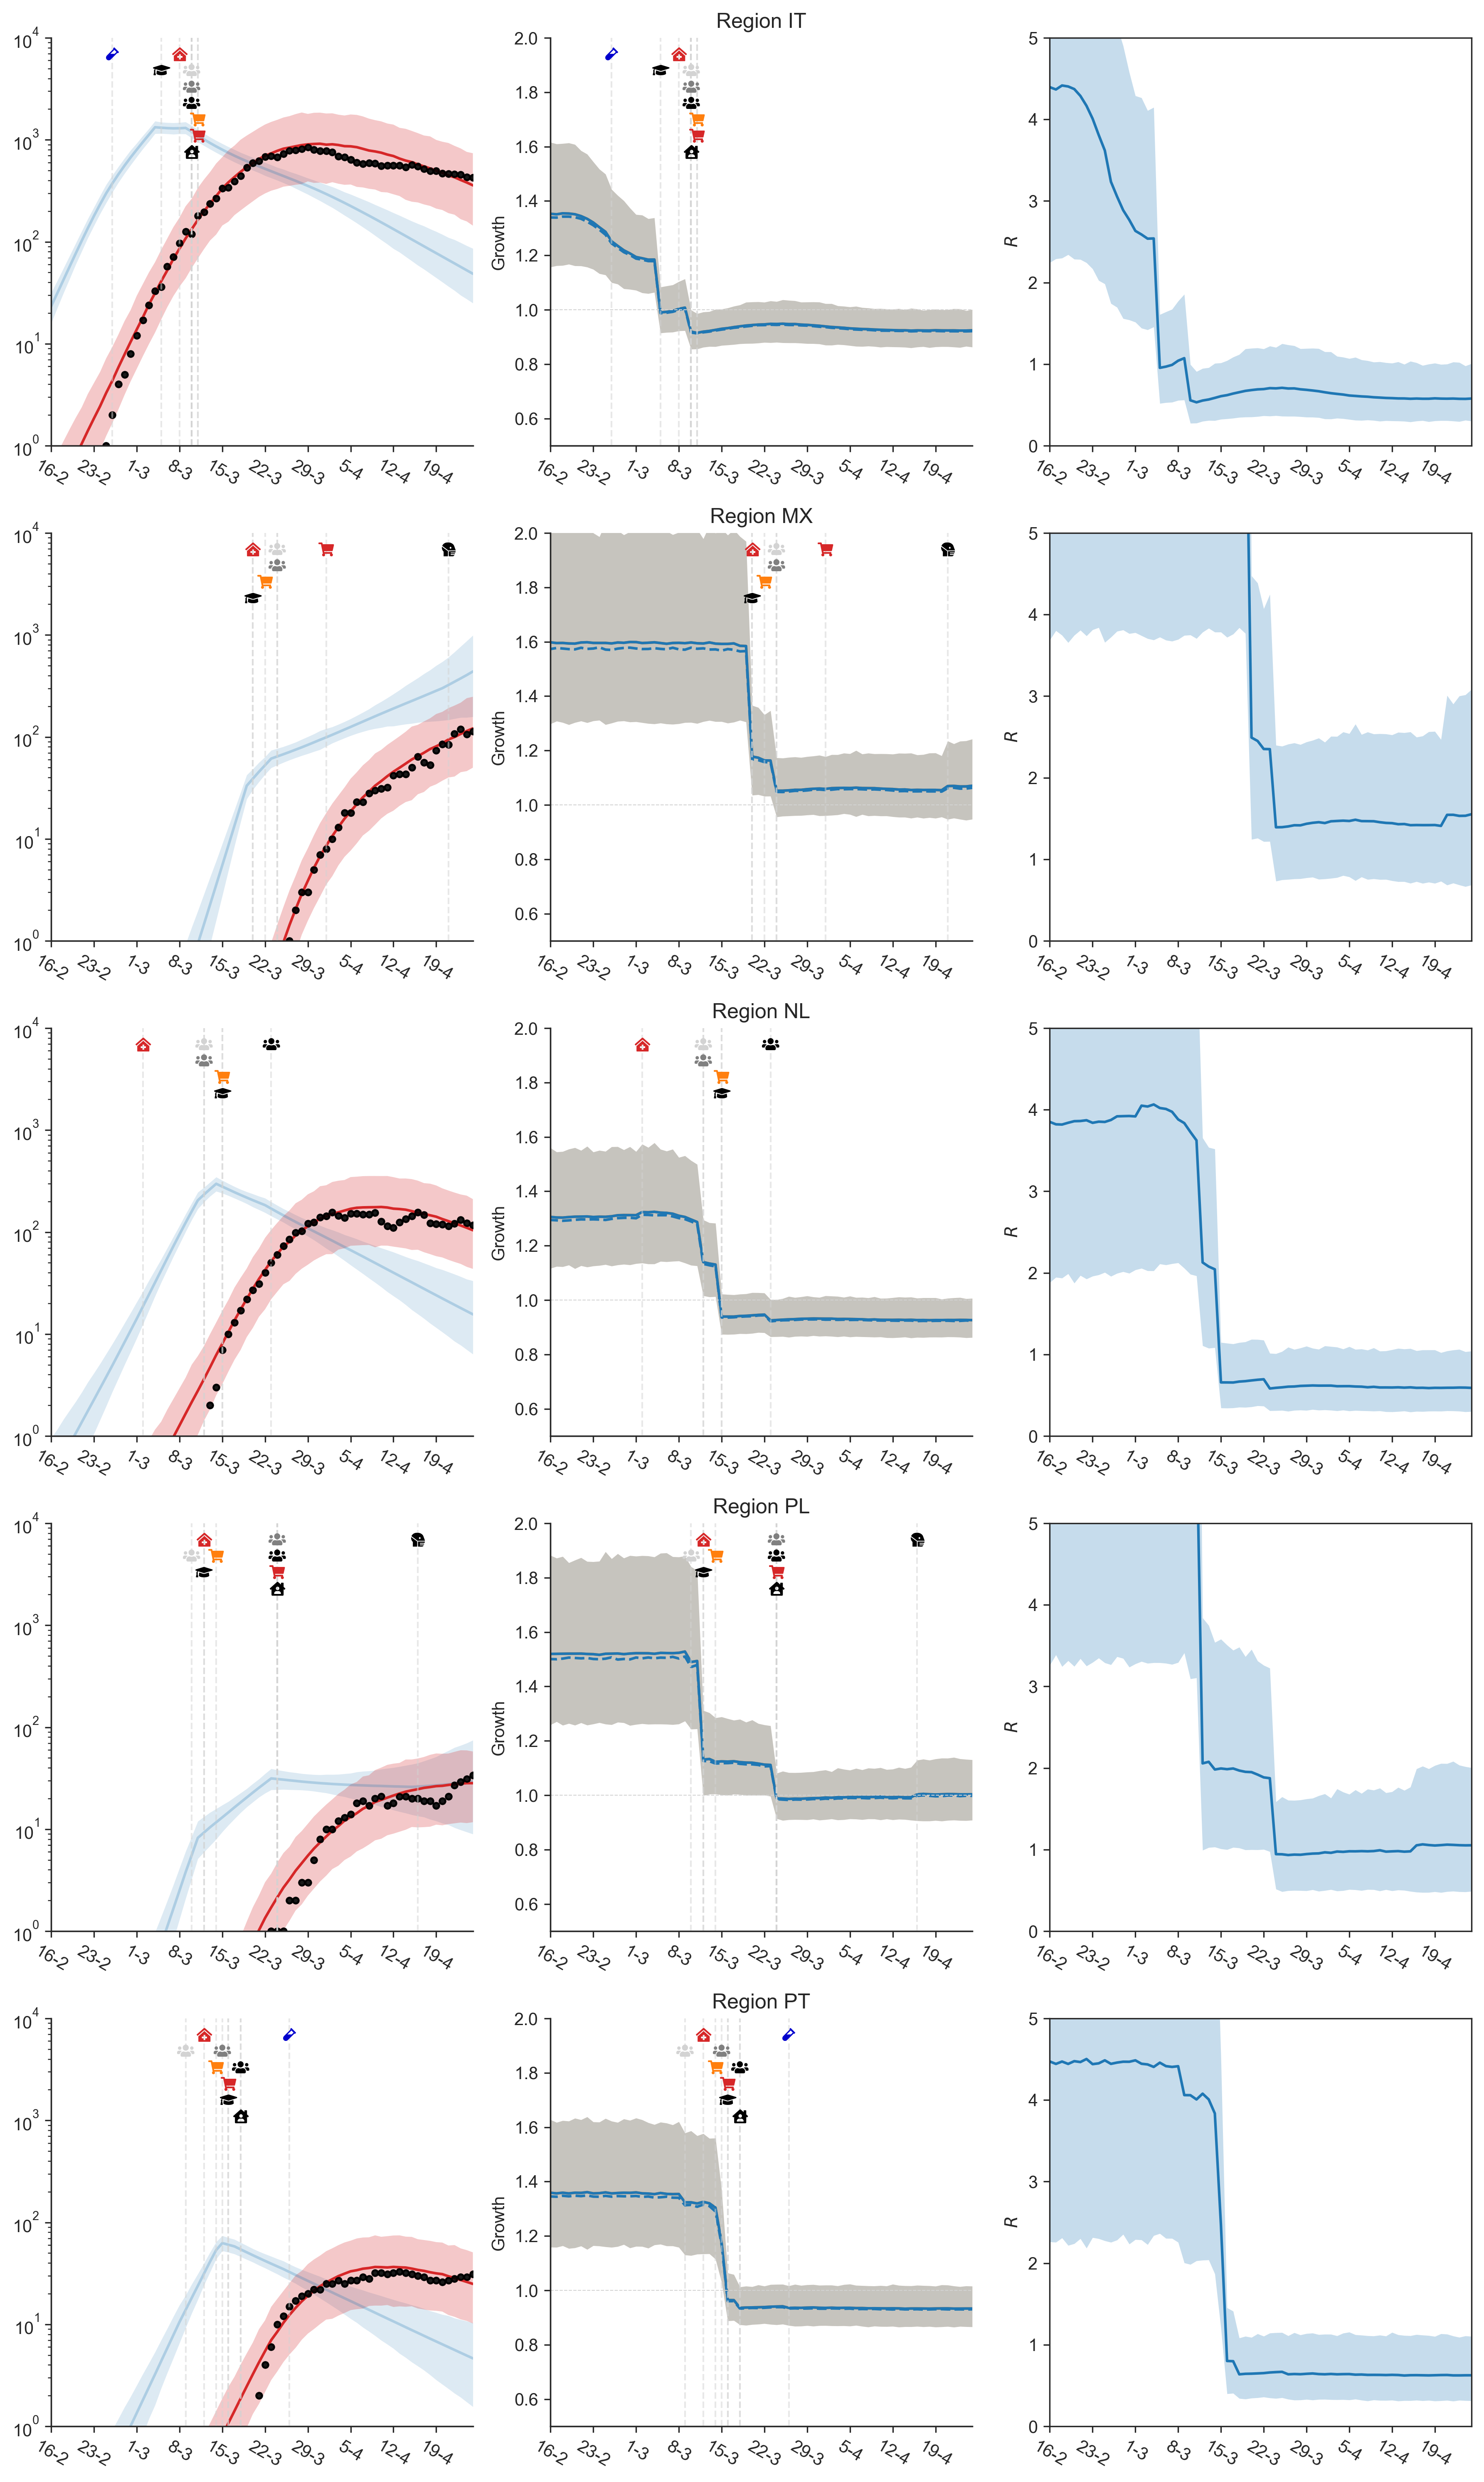

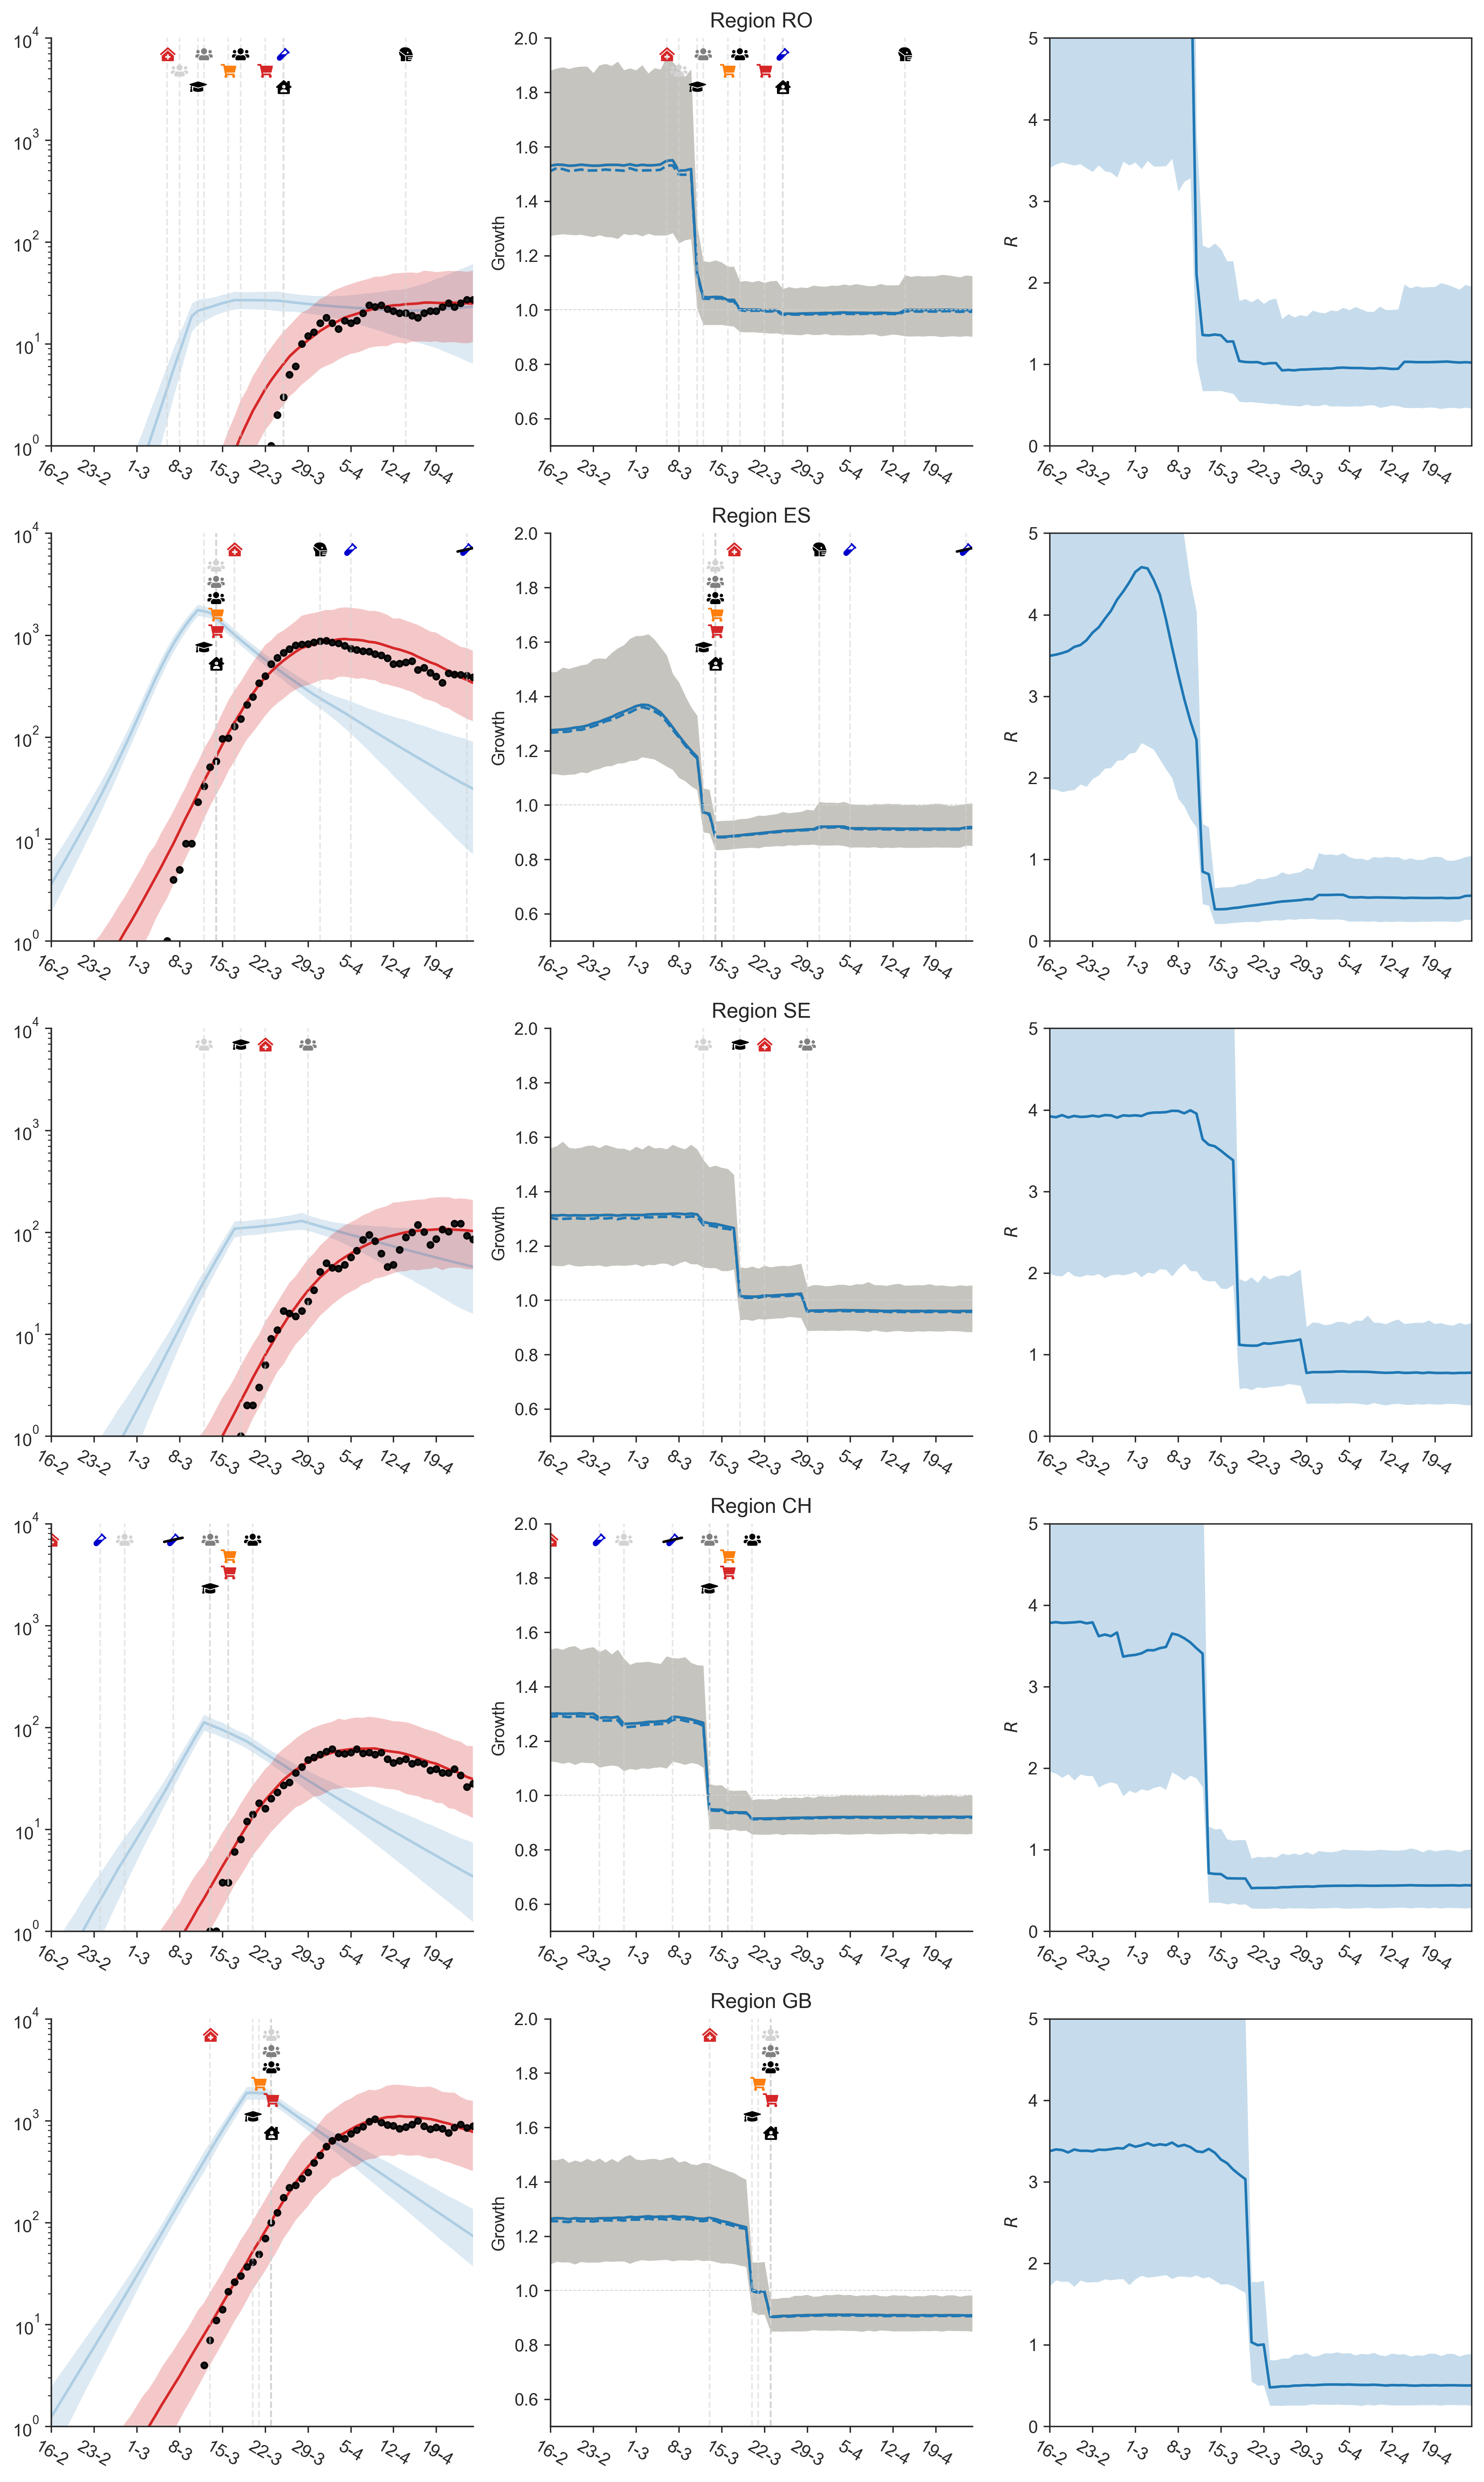

In [23]:
cm_plot_style = [
            ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]

model.plot_region_predictions(cm_plot_style)

In [35]:
pm.backends.text.dump("death_model", model.trace)

In [36]:
model.trace

<MultiTrace: 2 chains, 2000 iterations, 16 variables>

In [37]:
import pickle
pickle.dump(model.trace, open("death.pkl", "wb" ) )